In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Load the dataset
Toyota = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df=Toyota.copy()
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080  

In [6]:
# droping constant column
df=df.drop(columns=['Cylinders'])
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [7]:
#convert into dummy variables
df=pd.get_dummies(df,columns=['Fuel_Type'],drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False


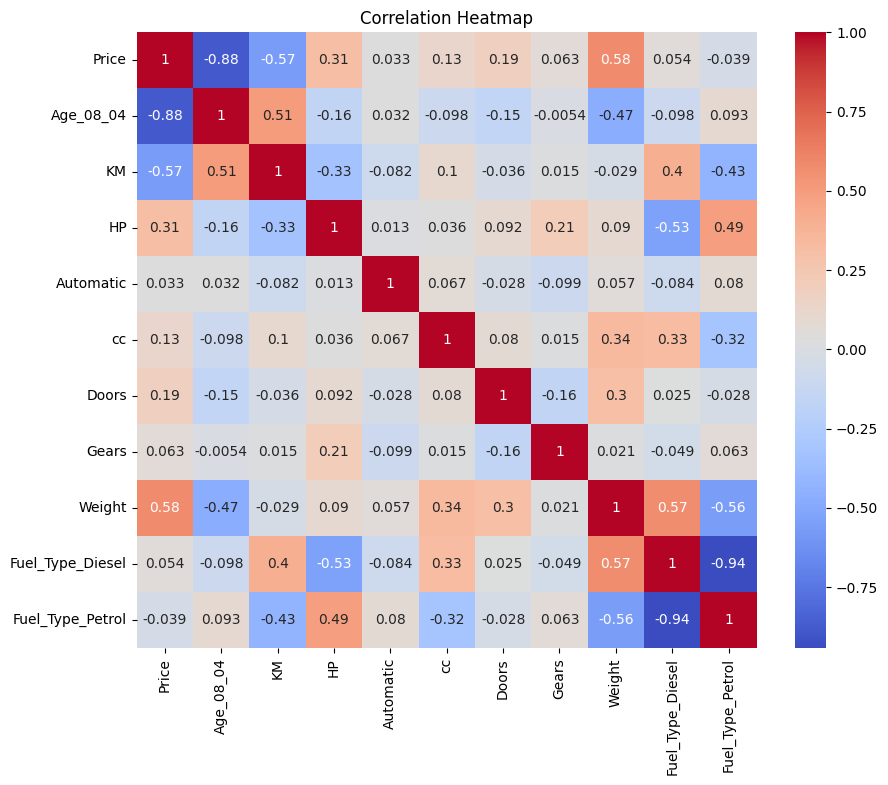

In [8]:
#Exploratory Data Analysis
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [9]:
# to check missing values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0
Fuel_Type_Diesel,0


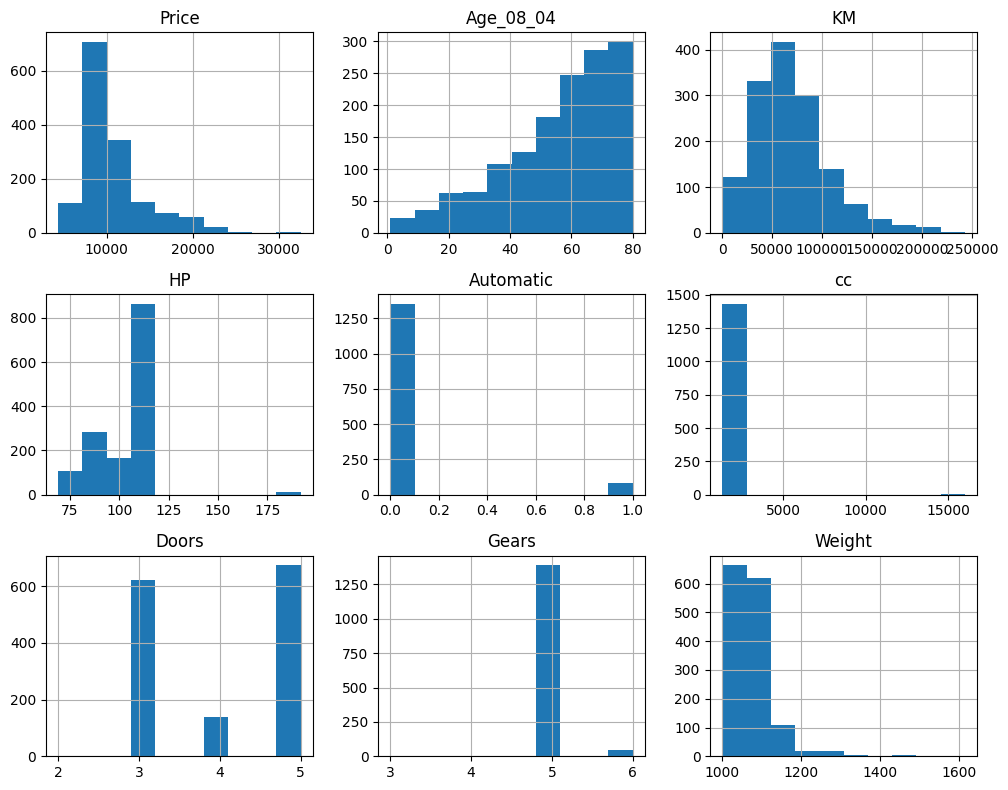

In [10]:
#Histograms for numeric predictors
df.hist(bins=10,figsize=(10,8))
plt.tight_layout()
plt.show()

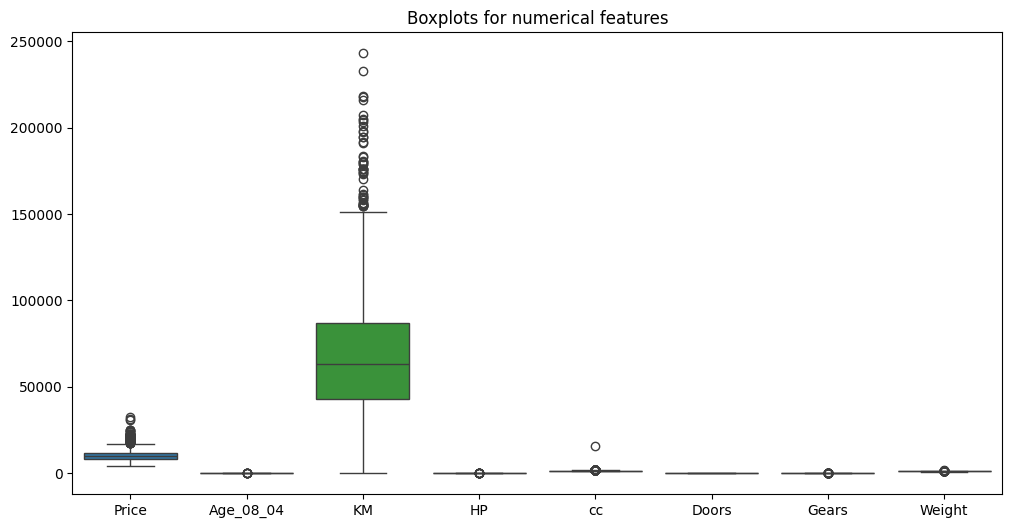

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']])
plt.title("Boxplots for numerical features")
plt.show()


In [12]:
#train-test split
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [14]:
#create and fit the model1
model = LinearRegression()
model.fit(X_train, y_train)

#coefficients
coefficients1=model.coef_
print("model 1 coefficients:",coefficients1)

model 1 coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  5.51600710e+02  2.58849583e+01
 -6.85487568e+01  1.37080891e+03]


In [15]:
from sklearn.preprocessing import PolynomialFeatures
#create interaction terms
poly = PolynomialFeatures(degree = 2,include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#fit the model2
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

#coefficients
coefficients2=model2.coef_
print("model 2 coefficients:",coefficients2)

model 2 coefficients: [ 1.81829439e+02 -2.20124020e-01 -5.40395978e+01  7.72478946e+03
  3.02532831e+01 -1.70674807e+04 -1.39756591e+03  1.90397795e+01
  6.23426057e+02 -6.28659453e+02  1.14101588e-02  3.98493714e-04
  8.11396091e-01  1.01807509e+01 -1.13435054e-01  1.31271076e+01
  1.24304085e+02 -8.18561161e-01  8.22965836e+01 -3.40169430e+01
 -8.94754739e-08 -3.12873900e-04 -2.60014813e-03  7.36136033e-06
 -3.49096130e-03 -3.06322325e-03  2.12905845e-04 -7.30655385e-04
  2.18787689e-02  4.57351584e-01 -2.17714463e+02 -5.52043747e-02
 -1.17150696e+01  5.58682454e+01  1.10921102e-01 -2.78799648e+02
 -3.50913498e+02  7.72478947e+03  1.54868811e+01 -3.04406066e+02
 -4.26096671e+03 -4.68243340e+00 -4.91127139e-11  1.04359311e+04
 -1.53248936e-03 -3.82217775e-01 -2.79860810e+00  1.87872381e-02
 -1.29010380e+01 -1.62772410e+01 -2.62744719e+02  2.61199240e+03
  7.03140248e+00 -5.45041108e+02 -1.00736947e+02  1.90350675e+02
 -1.69293652e+01  3.11713029e+03  9.60473788e+02 -8.27687140e-04
  2

In [16]:
#select features based on correlation
selected_features = ['Age_08_04', 'KM', 'HP','Automatic', 'cc', 'Weight', 'Fuel_Type_Petrol']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#fit the model3
model3 = LinearRegression()
model3.fit(X_train_selected, y_train)

#coefficients
coefficients3=model3.coef_
print("model 3 coefficients:",coefficients3)

model 3 coefficients: [-1.20903250e+02 -1.61561648e-02  1.64678483e+01  1.20991038e+02
 -3.20520803e-02  2.51946305e+01  1.34684173e+03]


In [17]:
#function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [18]:
#evaluate all models
rmse1, r2_1 = evaluate_model(model, X_test, y_test)
rmse2, r2_2 = evaluate_model(model2, X_test_poly, y_test)
rmse3, r2_3 = evaluate_model(model3, X_test_selected, y_test)

print(f"model 1 - RMSE: {rmse1}, R^2: {r2_1}")
print(f"model 2 - RMSE: {rmse2}, R^2: {r2_2}")
print(f"model 3 - RMSE: {rmse3}, R^2: {r2_3}")

model 1 - RMSE: 1484.2654153296505, R^2: 0.8348888040611084
model 2 - RMSE: 1756.4340543226144, R^2: 0.7687844255557994
model 3 - RMSE: 1487.0154845399068, R^2: 0.8342763962494079


In [19]:
#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_rmse, lasso_r2 = evaluate_model(lasso, X_test, y_test)
print(f"Lasso Regression - RMSE: {lasso_rmse}, R^2: {lasso_r2}")

#Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_rmse, ridge_r2 = evaluate_model(ridge, X_test, y_test)
print(f"Ridge Regression - RMSE: {ridge_rmse}, R^2: {ridge_r2}")

Lasso Regression - RMSE: 1484.0048045827489, R^2: 0.8349467801805
Ridge Regression - RMSE: 1484.1604509512758, R^2: 0.8349121559240102


Interview Questions

1.What is Normalization & Standardization and how is it helpful?

-> Normalization is the process of organizing data in database. it scales data to a range like 0 to 1.

-> Standardization is the process of transforming data to have a mean of 0 and a standar deviation of 1.

These techniques help improve model performance and ensure all features contribute equally.

2.What techniques can be used to address multicollinearity in multiple linear regression?

->Lasso regression and Ridge Regression  techniques.  
this techniques help improve model stability and interpretability.